In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
data = pd.read_csv('/content/Data_sample.csv')

In [ ]:
data.head()

,Unnamed: 0,ID,Fold,Target,Var4,Var5,Var6,Var7,Var8,Var9,...,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163
0,1,1,IS,0,40,3,1,5304.570,0,18.609524,...,0,0,0,1,0,0,0,53.04570,1,6
1,2,2,IS,0,26,4,1,884.095,0,25.970874,...,0,0,0,0,0,0,0,884.09500,3,5
2,4,3,IS,0,30,2,1,3536.380,0,25.686275,...,0,0,0,1,0,0,0,88.40950,1,0
3,5,4,IS,0,52,1,1,884.095,0,18.019608,...,0,0,0,0,0,0,0,353.63800,7,2
4,6,5,IS,0,31,2,1,9725.045,0,28.666667,...,0,0,0,0,0,0,0,8.84095,9,3


In [ ]:
data = data.drop(data.columns[0], axis=1)
data.head()

,ID,Fold,Target,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163
0,1,IS,0,40,3,1,5304.570,0,18.609524,8,...,0,0,0,1,0,0,0,53.04570,1,6
1,2,IS,0,26,4,1,884.095,0,25.970874,13,...,0,0,0,0,0,0,0,884.09500,3,5
2,3,IS,0,30,2,1,3536.380,0,25.686275,46,...,0,0,0,1,0,0,0,88.40950,1,0
3,4,IS,0,52,1,1,884.095,0,18.019608,17,...,0,0,0,0,0,0,0,353.63800,7,2
4,5,IS,0,31,2,1,9725.045,0,28.666667,24,...,0,0,0,0,0,0,0,8.84095,9,3


In [ ]:
# EDA
# looking for basic stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13015 entries, 0 to 13014
Columns: 163 entries, ID to Var163
dtypes: float64(19), int64(143), object(1)
memory usage: 16.2+ MB


In [ ]:
# looking for unique value and counts in that
for i in data.columns:
    print(f"Unique {i}'s count : {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

Unique ID's count : 13015
[    1     2     3 ... 13013 13014 13015]

Unique Fold's count : 2
['IS' 'OS']

Unique Target's count : 2
[0 1]

Unique Var4's count : 34
[40 26 30 52 31 41 33 25 38 35 36 43 48 45 29 42 28 34 47 49 27 50 37 44
 51 23 54 53 39 32 24 22 46 55]

Unique Var5's count : 5
[3 4 2 1 5]

Unique Var6's count : 2
[1 2]

Unique Var7's count : 7347
[5304.57   884.095 3536.38  ...  157.429  786.645 6299.44 ]

Unique Var8's count : 2
[0 1]

Unique Var9's count : 11689
[18.60952381 25.97087379 25.68627451 ... 16.0859375   7.99264706
 15.42105263]

Unique Var10's count : 50
[ 8 13 46 17 24  9 49 44 35 50 11 38 20 25 33 23 22 16 18 47  3 14 15  5
  7  6 30 31 10  4 12 28 29 37  1 19  2 21 34 27 43 42 36 39 40 32 26 41
 48 45]

Unique Var11's count : 2
[1 0]

Unique Var12's count : 1
[0]

Unique Var13's count : 36
[ 1.   5.   4.   2.   8.   6.  13.  12.  10.   2.5  3.  25.   1.5 16.
 15.   7.   9.  20.  14.  18.  22.  30.  28.  17.  24.  23.  11.  35.
 32.  21.  19.  26.  27.  

In [ ]:
# to see if there are missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [ ]:
#assuming that the nominal/ordinal data have not more than 15 categories
columns_with_more_than_15_unique_values = []

for column in data.columns:
    unique_count = data[column].nunique()
    if unique_count > 15:
        columns_with_more_than_15_unique_values.append(column)

print("Columns with more than 15 unique values:", columns_with_more_than_15_unique_values)

Columns with more than 15 unique values: ['ID', 'Var4', 'Var7', 'Var9', 'Var10', 'Var13', 'Var14', 'Var21', 'Var22', 'Var24', 'Var25', 'Var44', 'Var54', 'Var55', 'Var56', 'Var72', 'Var73', 'Var81', 'Var82', 'Var83', 'Var95', 'Var129', 'Var130', 'Var131', 'Var136', 'Var161']


In [ ]:
# removing the ID column and adding the Target column
columns_with_more_than_15_unique_values.pop(0)
columns_to_include = columns_with_more_than_15_unique_values + ['Target']
new_cols = data[columns_to_include]
new_cols

,Var4,Var7,Var9,Var10,Var13,Var14,Var21,Var22,Var24,Var25,...,Var81,Var82,Var83,Var95,Var129,Var130,Var131,Var136,Var161,Target
0,40,5304.5700,18.609524,8,1.0,5.0,5,25,176.81900,530.4570,...,0.640122,8.7400,884.0950,13.5,0.3333,5.0000,1.6667,11.379807,53.04570,0
1,26,884.0950,25.970874,13,5.0,15.0,3,9,442.04750,618.8665,...,0.980294,8.5600,1768.1900,8.5,0.7143,4.0000,2.8571,8.532292,884.09500,0
2,30,3536.3800,25.686275,46,4.0,2.0,6,36,176.81900,1768.1900,...,0.961452,17.5000,1768.1900,17.5,0.1000,10.0000,1.0000,16.070677,88.40950,0
3,52,884.0950,18.019608,17,4.0,10.0,13,169,353.63800,884.0950,...,0.487950,12.1400,884.0950,14.5,0.4000,2.5000,1.0000,9.224966,353.63800,0
4,31,9725.0450,28.666667,24,2.0,10.0,3,9,114.93235,265.2285,...,1.360595,17.0200,884.0950,21.0,0.4333,7.6923,3.3333,24.320773,8.84095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,43,141.7266,14.377778,24,15.0,30.0,15,225,472.42200,7862.2500,...,1.318870,18.1875,1181.0550,15.0,0.0333,2.5000,0.2000,12.160044,787.37000,0
13011,40,236.1435,16.085938,19,10.0,35.0,3,9,283.37220,440.8012,...,1.425393,15.1250,1102.0030,17.0,0.6429,3.8889,2.5000,9.311283,12.59432,0
13012,46,157.4290,7.992647,2,15.0,40.0,3,9,157.42900,236.1435,...,1.426785,8.4688,1180.7175,9.5,0.6667,7.5000,5.0000,12.060956,78.71450,0
13013,34,786.6450,15.395522,31,7.0,20.0,4,16,471.98700,7862.2500,...,1.290994,23.6250,1179.9675,11.5,0.0333,2.5000,0.2000,18.691353,157.32900,0


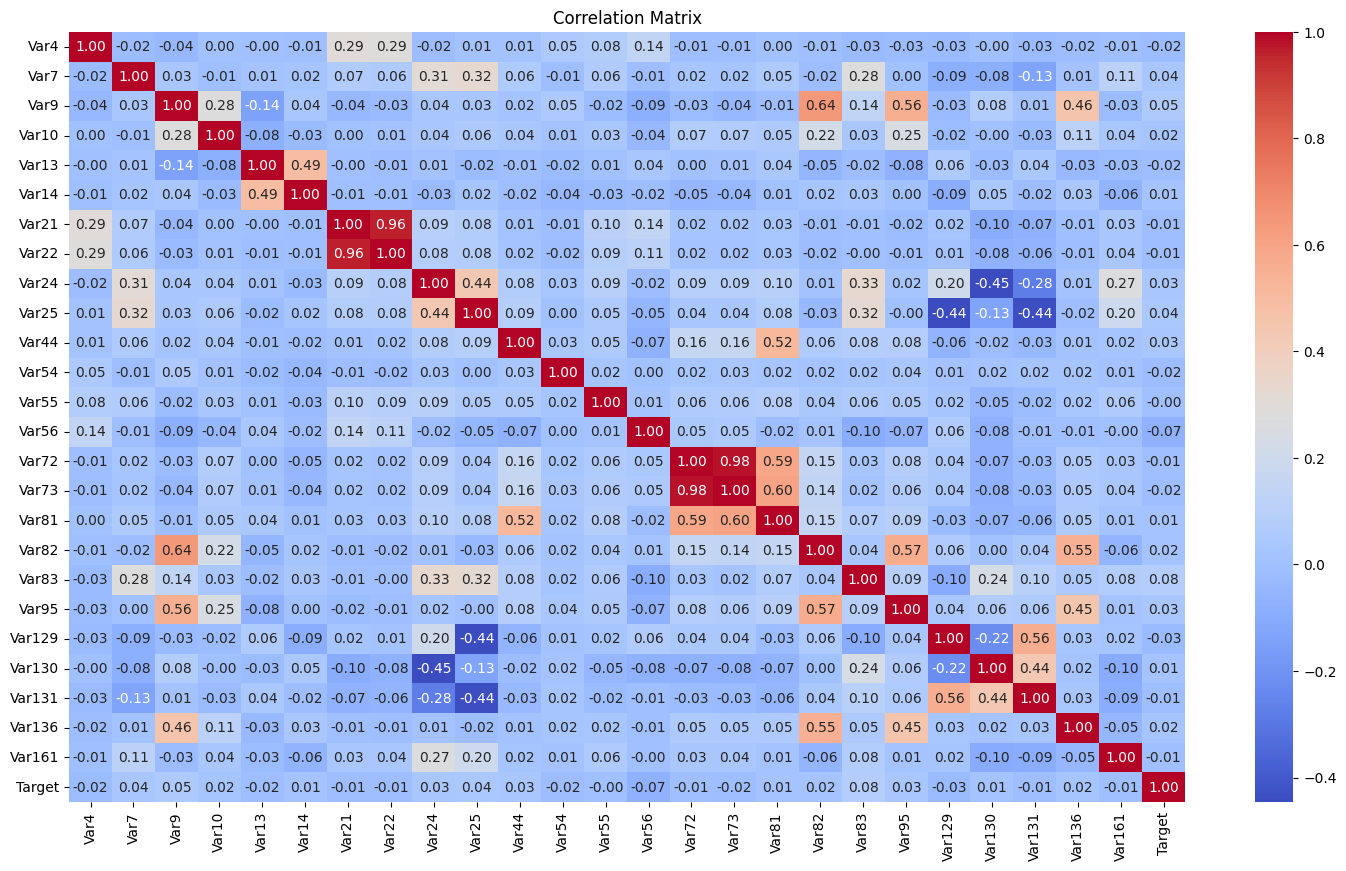

In [ ]:
# Create a correlation matrix
correlation_matrix = new_cols.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# as we can see here the variables are causing problem of 'Multicollinearity', so further we will have to apply L2 regularization

In [ ]:
data['Target'].value_counts()/len(data)*100

0    97.840953
1     2.159047
Name: Target, dtype: float64

In [ ]:
#as we can see here there is class imbalance also 0 - ' Current loan ' is quite greater than 1 - 'Defaulted loan'
# this may require SMOTE further.

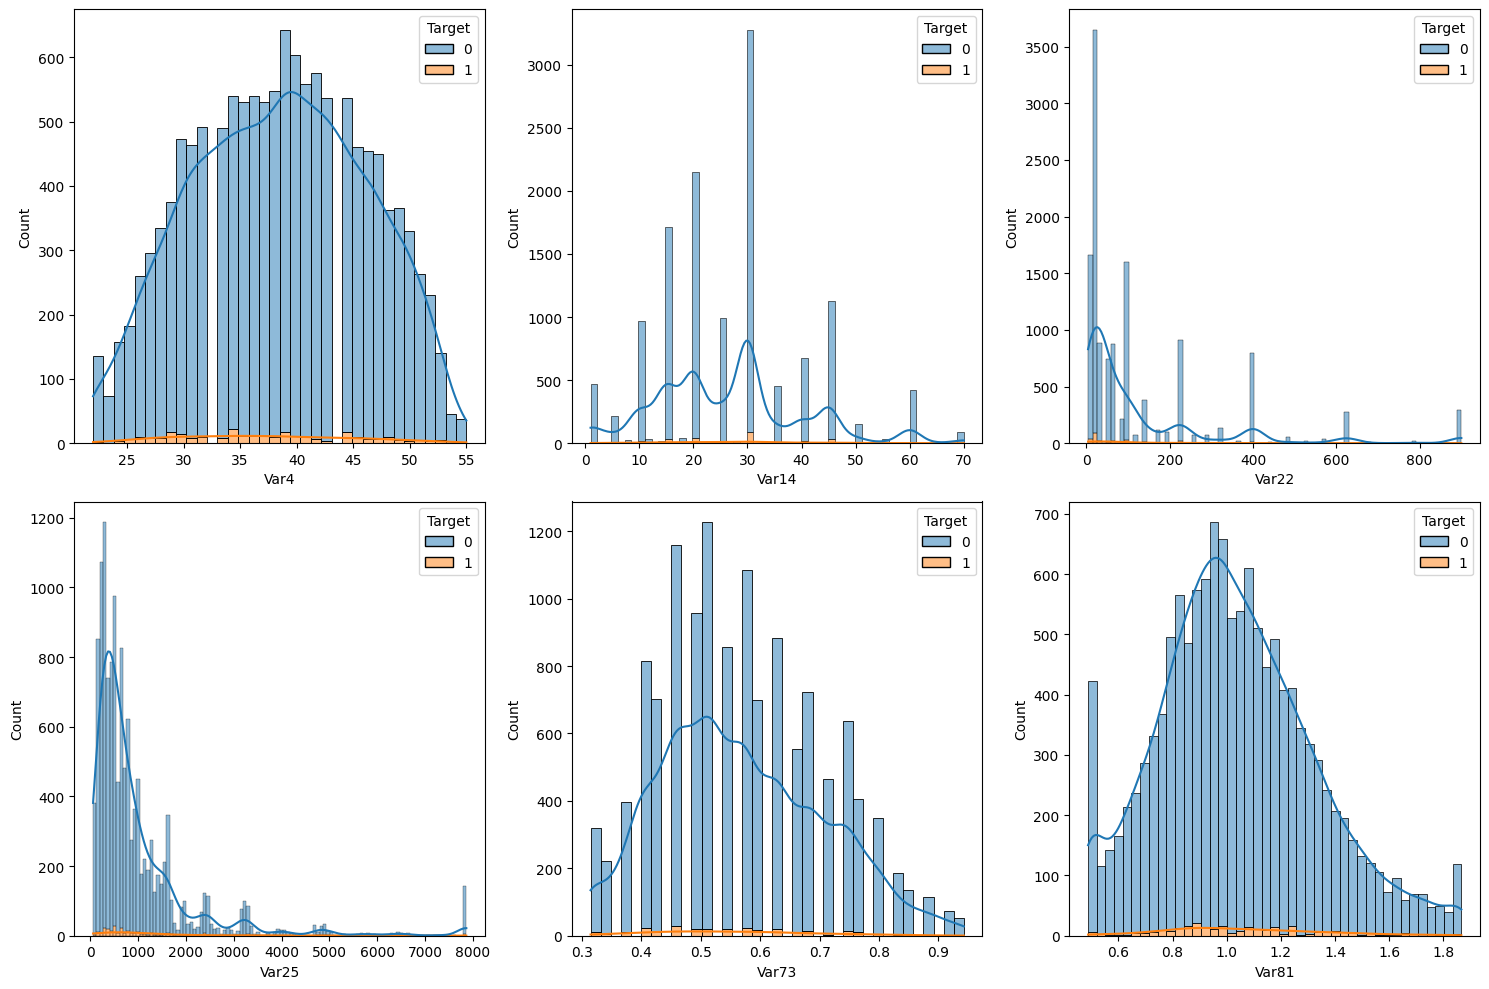

In [ ]:
# lets us see some variables' influence on target variable
num_cols = ['Var4', 'Var14', 'Var22', 'Var25', 'Var73', 'Var81']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(num_cols):
    sns.histplot(data=data, x=col, hue='Target', multiple='stack', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Now ML part
# Splitting the data into training and testing
X_train = data[data['Fold'] == 'IS'].drop(['ID', 'Fold', 'Target'], axis=1)
y_train = data[data['Fold'] == 'IS']['Target']
X_test = data[data['Fold'] == 'OS'].drop(['ID', 'Fold', 'Target'], axis=1)
y_test = data[data['Fold'] == 'OS']['Target']

In [ ]:
# Standardizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Applying SMOTE to the training
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}
logreg_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg_model, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
# best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1000, 'penalty': 'l2'}


In [ ]:
# best model according to hyperparameters
best_logreg_model = grid_search.best_estimator_


In [ ]:
# Evaluating the model on the test
y_pred = best_logreg_model.predict(X_test_scaled)
y_prob = best_logreg_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")
best_model_roc_auc = roc_auc_score(y_test, y_prob)
print(f"Best Model ROC AUC: {best_model_roc_auc:.2f}")

Best Model Accuracy: 0.90
Best Model ROC AUC: 0.52


In [ ]:
# ROC AUC is below 7, lets go for cross validation
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_roc_auc_scores = cross_val_score(best_logreg_model, X_train_smote, y_train_smote, scoring='roc_auc', cv=cv)
average_cv_roc_auc = np.mean(cv_roc_auc_scores)
print(f"Average Cross-Validation ROC AUC: {average_cv_roc_auc:.2f}")

Average Cross-Validation ROC AUC: 0.87


In [ ]:
# Feature Importance
feature_importances = np.abs(best_logreg_model.coef_.flatten())
selected_features = np.argsort(feature_importances)[::-1][:10]

In [ ]:
# Get the column names corresponding to the selected features
selected_feature_names = X_train.columns[selected_features]

In [ ]:
# Print the top 10 feature importances with variable names
print("Top 10 Feature Importances:")
for name, importance in zip(selected_feature_names, feature_importances[selected_features]):
    print(f"{name}: {importance:.4f}")

Top 10 Feature Importances:
Var72: 16.8939
Var73: 12.3827
Var79: 3.2832
Var92: 2.5411
Var65: 2.0800
Var80: 1.9755
Var77: 1.9743
Var36: 1.9552
Var78: 1.9065
Var75: 1.8600


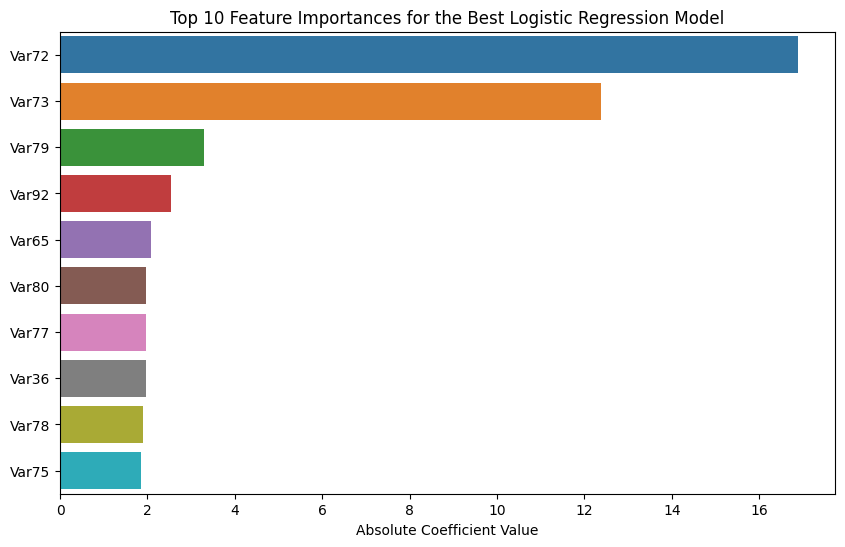

In [ ]:
# Visualize feature importances for the best model
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[selected_features], y=selected_feature_names)
plt.title('Top 10 Feature Importances for the Best Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.show()

In [ ]:
# Save the best model
joblib.dump(best_logreg_model, 'best_logreg_model.pkl')
print('Best Logistic Regression model saved!')

Best Logistic Regression model saved!
